Sistem rekomendasi musik menggunakan pendekatan
Collaborative Filtering dengan Neural Network. Sistem akan memprediksi rating
popularity track musik berdasarkan interaksi pengguna- Yuliana Habibah

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

Kode tersebut digunakan untuk mengimpor berbagai pustaka (library) yang diperlukan dalam program.


## Load and inspeksi Data

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/YulianaHabibah/dataset/refs/heads/main/dataset.csv"
df = pd.read_csv(url)

Mengunduh dasaset dari URL GitHub yang berisi data track music dengan berbagai atribut

### Univariate Exploratory Data Analysis

#### df Variabel

In [ ]:
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\n5 Baris Pertama Dataset:")
print(df.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  l

Menampilkan:
1. Informasi struktur dataset (kolom, tipe data, non-null count)
2. 5 baris pertama data untuk melihat contoh isi dataset

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Menampilkan statistik deskriptif untuk kolom numerik:
- count: Jumlah data
- mean: Rata-rata
- std: Standar deviasi
- min: Nilai minimum
- 25%, 50%, 75%: Kuartil
- max: Nilai maksimum

In [ ]:
print(f"Jumlah df duplikat: {df.duplicated().sum()}")
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())
print(f"\nTotal jumlah missing values: {df.isnull().sum().sum()}")

Jumlah df duplikat: 0

Jumlah Missing Value per Kolom:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Total jumlah missing values: 3


Memeriksa:
1. Data duplikat = 0
2. Missing values per kolom
3. Total missing values = 3

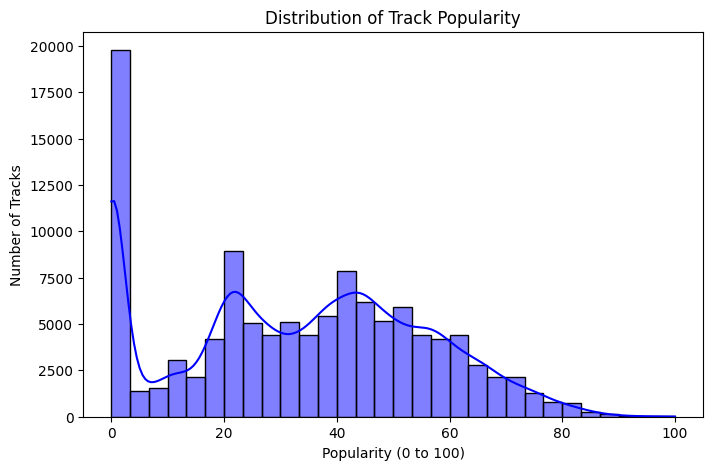

In [ ]:
# Set the size of the plot (width=8 inches, height=5 inches)
plt.figure(figsize=(8,5))

sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity (0 to 100)")
plt.ylabel("Number of Tracks")

plt.show()

Visualisasi distribusi popularity track:
- Histogram dengan 30 bins
- Kurva KDE (Kernel Density Estimation)
- Sumbu x: Skor popularity (0-100)
- Sumbu y: Jumlah track

### Multivariate Variable

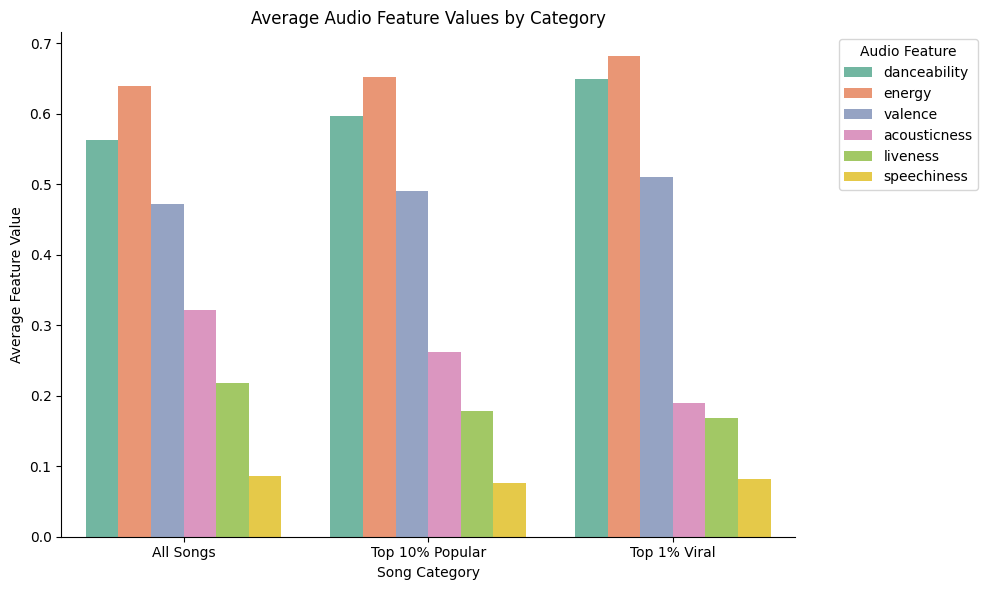

In [ ]:
# Fitur yang digunakan
features = ['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness']

# Bersihkan df dari missing value di kolom fitur
cleaned_df = df.dropna(subset=features)

# Hitung threshold popularitas
n_rows = len(cleaned_df)
top_1pct_idx = int(n_rows * 0.01)
top_10pct_idx = int(n_rows * 0.10)

# Urutkan berdasarkan popularitas
sorted_df = cleaned_df.sort_values(by='popularity', ascending=False)

# Tandai lagu viral dan populer
cleaned_df = cleaned_df.copy()
cleaned_df['hit_label'] = 0
cleaned_df.loc[sorted_df.index[:top_10pct_idx], 'hit_label'] = 2
cleaned_df.loc[sorted_df.index[:top_1pct_idx], 'hit_label'] = 1

# Tambahkan kategori label untuk visualisasi
label_map = {0: 'All Songs', 2: 'Top 10% Popular', 1: 'Top 1% Viral'}
cleaned_df['category'] = cleaned_df['hit_label'].map(label_map)

# Hitung nilai rata-rata per kategori untuk fitur-fitur
mean_features = (
    cleaned_df
    .groupby('category')[features]
    .mean()
    .reset_index()
    .melt(id_vars='category', var_name='Feature', value_name='Mean')
)

# Plot menggunakan seaborn dengan palet modern
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_features,
    x='category',
    y='Mean',
    hue='Feature',
    order=['All Songs', 'Top 10% Popular', 'Top 1% Viral'],
    palette='Set2'
)
plt.title('Average Audio Feature Values by Category')
plt.xlabel('Song Category')
plt.ylabel('Average Feature Value')
plt.legend(title='Audio Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

Analisis fitur audio berdasarkan kategori popularitas:
1. Membagi lagu menjadi 3 kategori:
   - Top 1% Viral (paling populer)
   - Top 10% Popular
   - All Songs (sisanya)
2. Menghitung rata-rata fitur audio untuk setiap kategori
3. Visualisasi perbandingan fitur audio antar kategori

In [ ]:
# Pastikan fitur sound level tersedia
sound_features = ['loudness', 'tempo', 'energy']

# Hapus missing values
df_clean = df.dropna(subset=sound_features)

# Tambahkan label kategori berdasarkan popularitas
n = len(df_clean)
top_1pct = int(n * 0.01)
top_10pct = int(n * 0.10)
df_sorted = df_clean.sort_values(by='popularity', ascending=False)

df_clean = df_clean.copy()
df_clean['hit_label'] = 0
df_clean.loc[df_sorted.index[:top_10pct], 'hit_label'] = 2
df_clean.loc[df_sorted.index[:top_1pct], 'hit_label'] = 1

label_map = {0: 'All Songs', 2: 'Top 10% Popular', 1: 'Top 1% Viral'}
df_clean['category'] = df_clean['hit_label'].map(label_map)

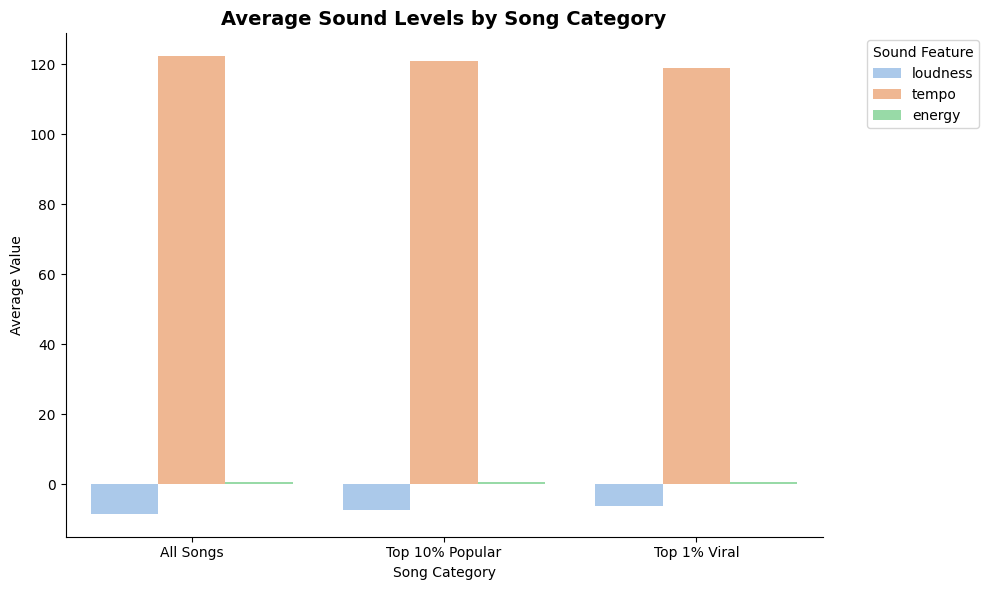

In [ ]:
# Hitung rata-rata fitur sound level untuk setiap kategori
mean_sound = (
    df_clean
    .groupby('category')[sound_features]
    .mean()
    .reset_index()
    .melt(id_vars='category', var_name='Sound Feature', value_name='Average Value')
)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_sound,
    x='category',
    y='Average Value',
    hue='Sound Feature',
    order=['All Songs', 'Top 10% Popular', 'Top 1% Viral'],
    palette='pastel'
)
plt.title('Average Sound Levels by Song Category', fontsize=14, weight='bold')
plt.xlabel('Song Category')
plt.ylabel('Average Value')
plt.legend(title='Sound Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

Analisis fitur suara berdasarkan popularitas:
1. Membagi lagu menjadi 3 kategori seperti sebelumnya
2. Menganalisis fitur suara (loudness, tempo, energy)
3. Visualisasi perbandingan fitur suara antar kategori

In [ ]:
# Pisahkan fitur numerik dan kategorikal
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

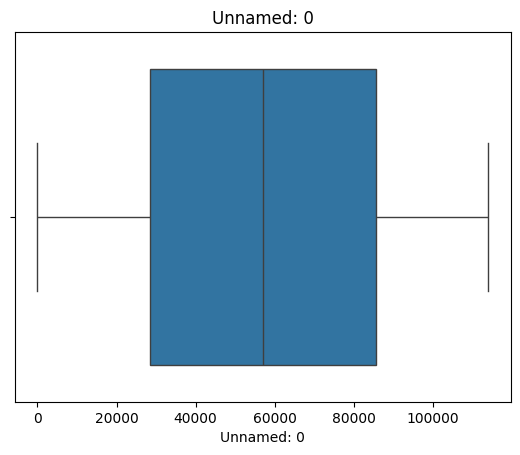

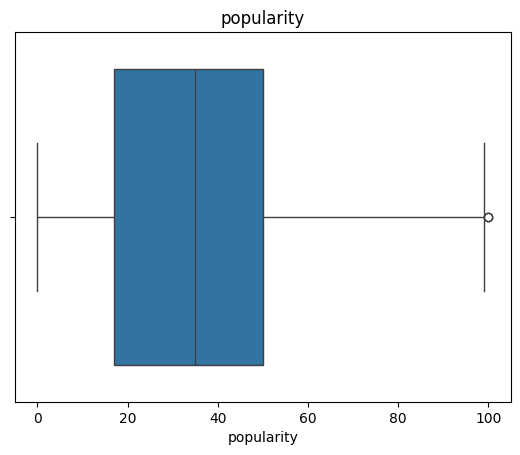

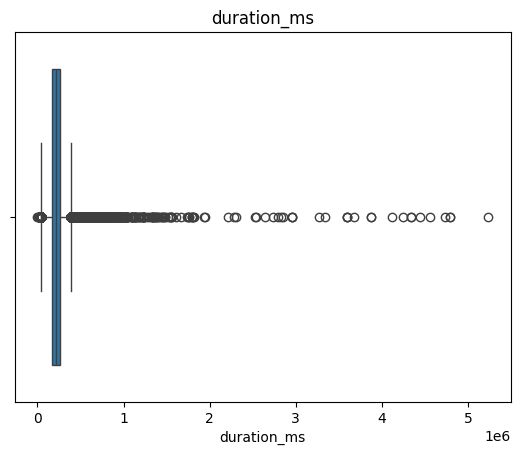

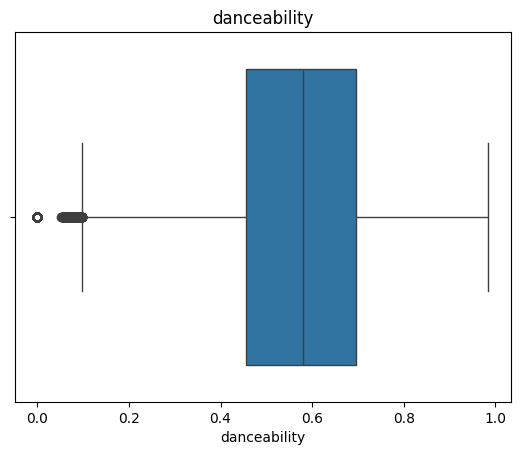

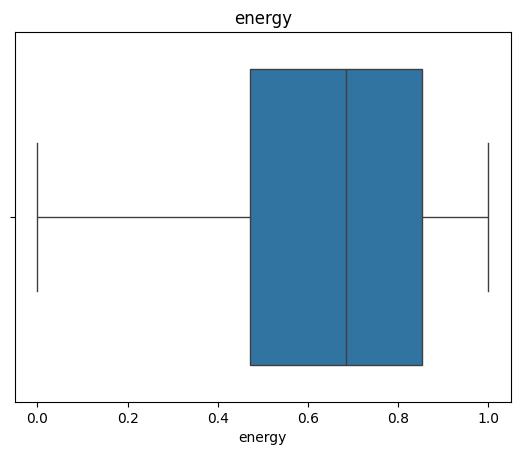

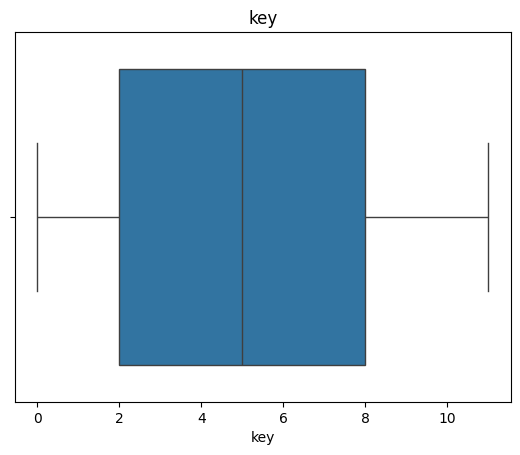

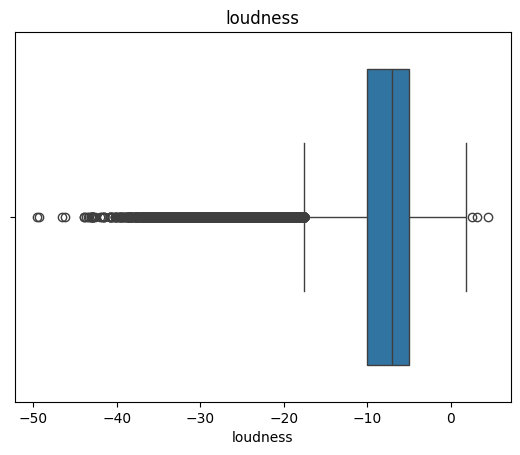

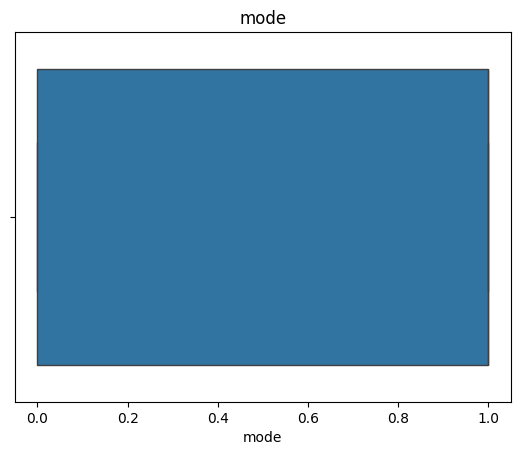

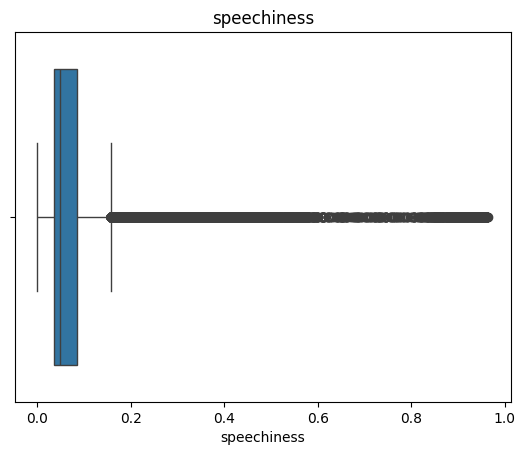

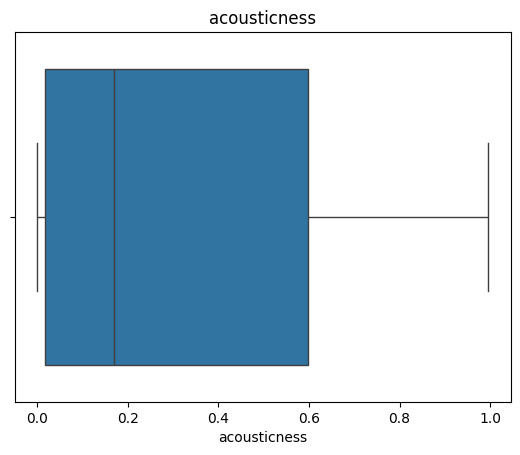

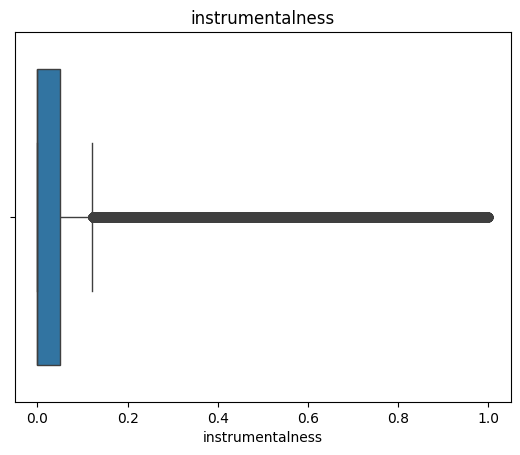

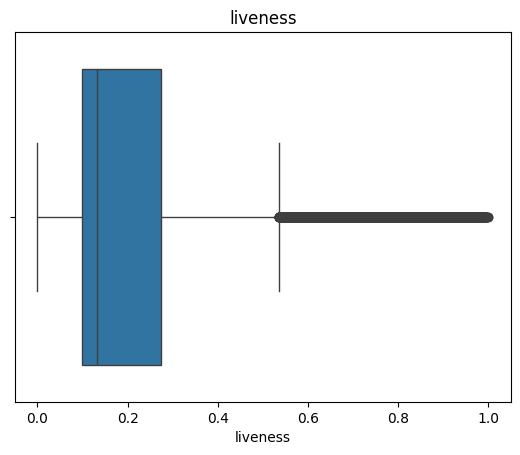

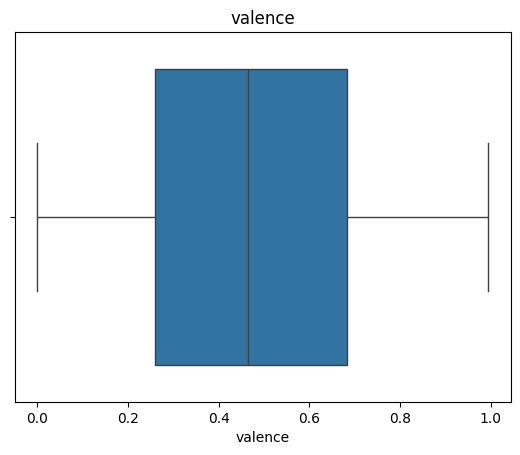

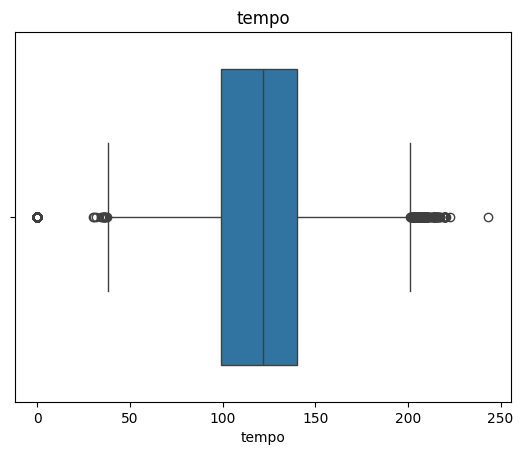

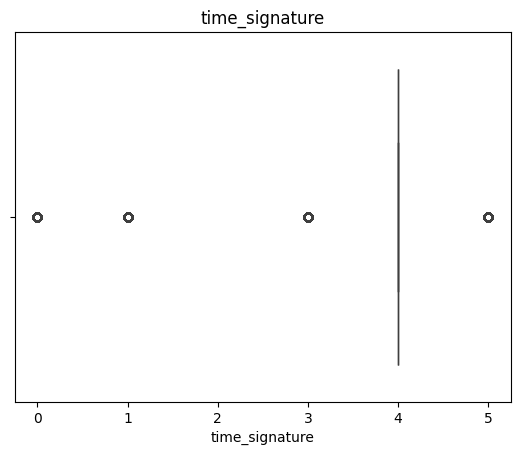

In [ ]:
# Cek outlier secara visual
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Deteksi outlier:
- Memisahkan kolom numerik dan kategorik
- Membuat boxplot untuk setiap fitur numerik
- Boxplot membantu mengidentifikasi nilai ekstrem (outlier)

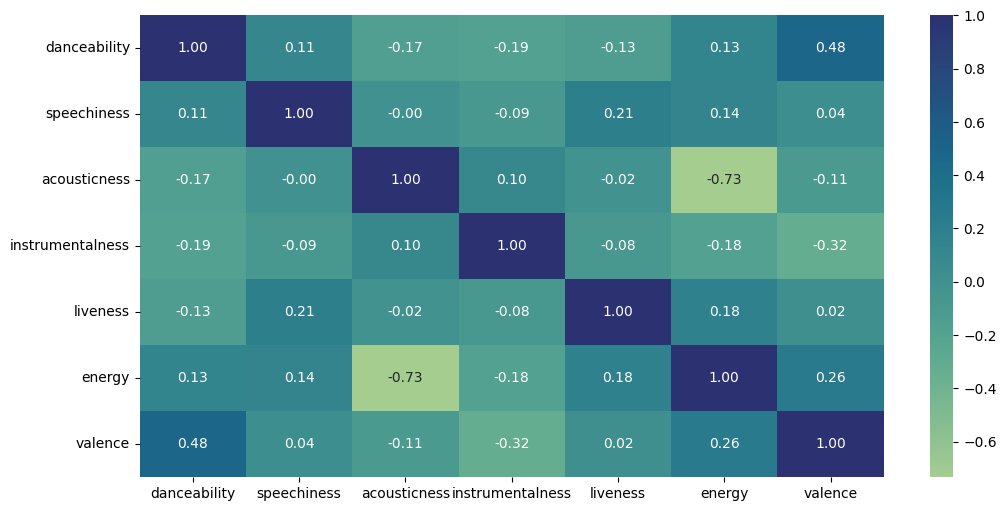

In [ ]:
corr_matrix = df[list(set(df.select_dtypes(include=['float64']).columns) - {'popularity', 'duration_ms', 'tempo', 'loudness', 'duration_min'})] \
.corr() # Creating correlation matrix

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot = True,  fmt=".2f", cmap="crest")
plt.show()

Matriks korelasi:
- Menunjukkan hubungan linear antar fitur
- Nilai antara -1 sampai 1
- Warna biru menunjukkan korelasi positif
- Warna gelap menunjukkan korelasi negatif
- Anotasi menunjukkan nilai korelasi

## Processing Data

Proses preparasi data meliputi:
1. Data Cleaning
2. Encoding ID pengguna dan musik ke indeks numerik
3. Normalisasi nilai popularity ke range 0-1
4. Visualisasi distribusi data popularity

#### Data Cleaning

In [ ]:
cols = ['artists', 'album_name', 'track_name']
df[cols] = df[cols].fillna(df[cols].mode().iloc[0])

In [ ]:
print(f"Jumlah df duplikat: {df.duplicated().sum()}")
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())
print(f"\nTotal jumlah missing values: {df.isnull().sum().sum()}")

Jumlah df duplikat: 0

Jumlah Missing Value per Kolom:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Total jumlah missing values: 0


Memeriksa kembali:
1. Data duplikat setelah cleaning
2. Missing values setelah cleaning

#### Handling outlier

In [ ]:
# Salin dataset agar tidak mengubah yang asli
df = df.copy()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization: ganti nilai outlier dengan batas IQR
    df[col] = np.where(
        df[col] < lower_bound, lower_bound,
        np.where(df[col] > upper_bound, upper_bound, df[col])
    )

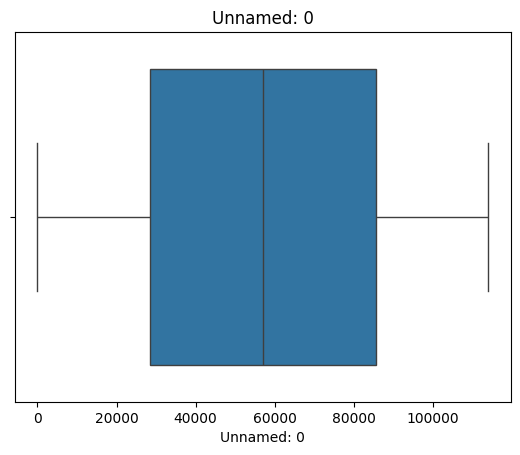

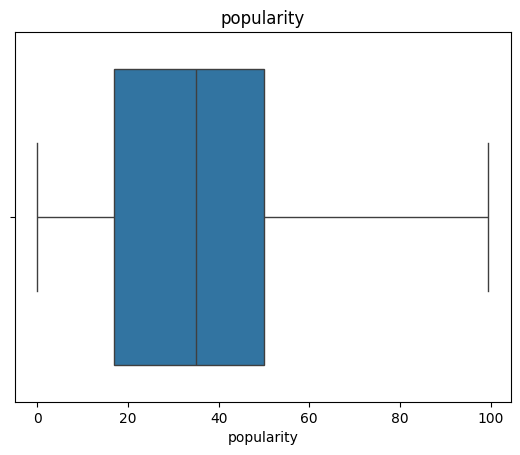

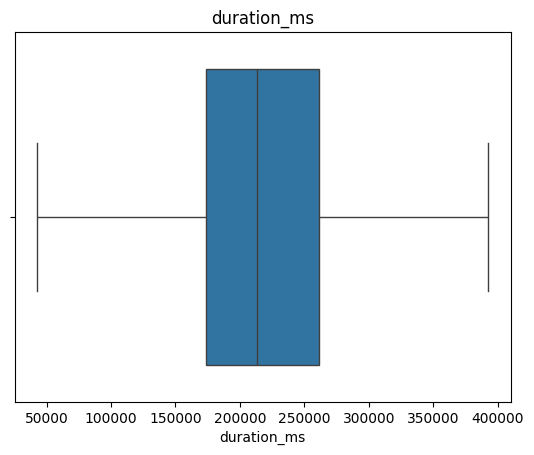

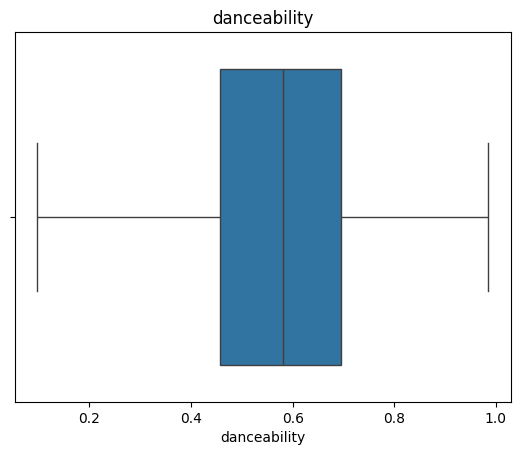

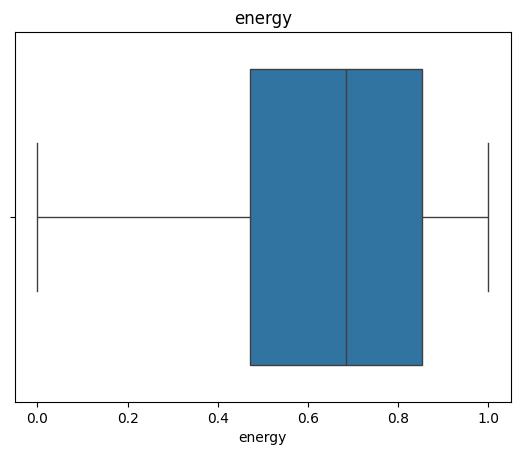

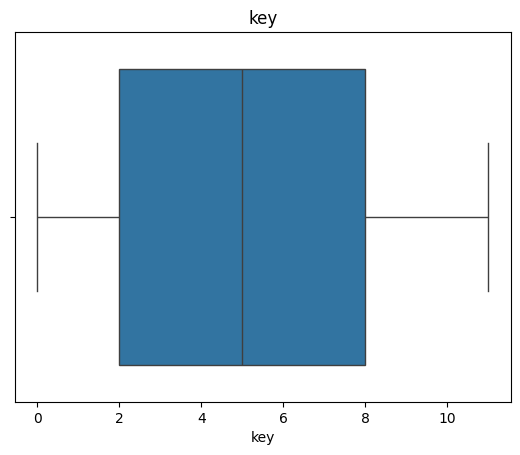

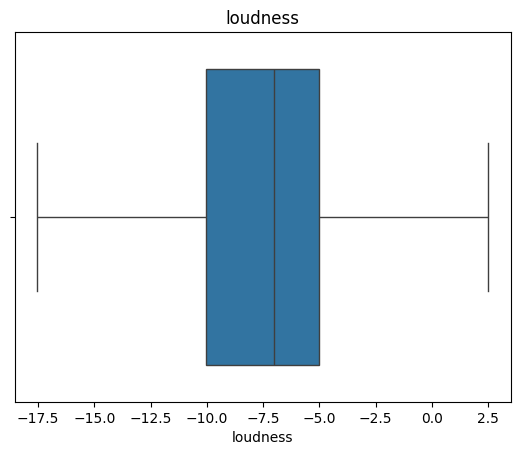

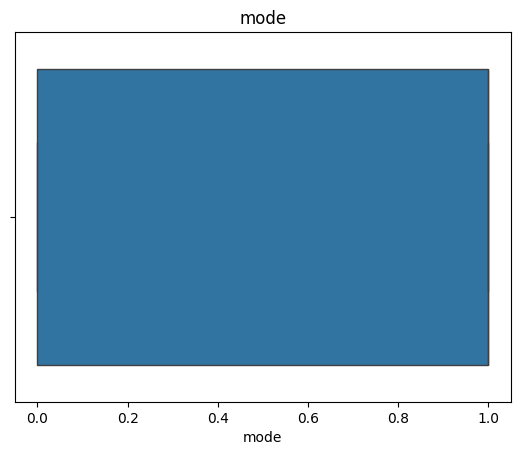

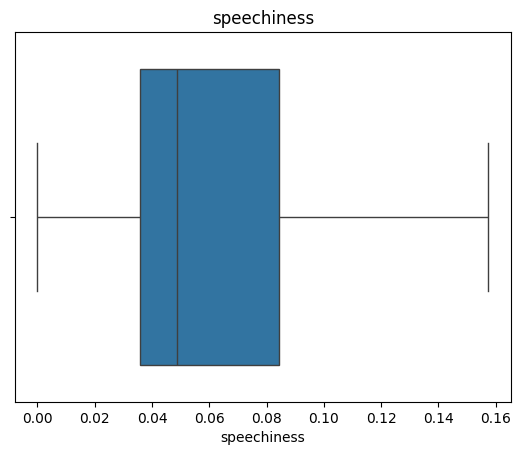

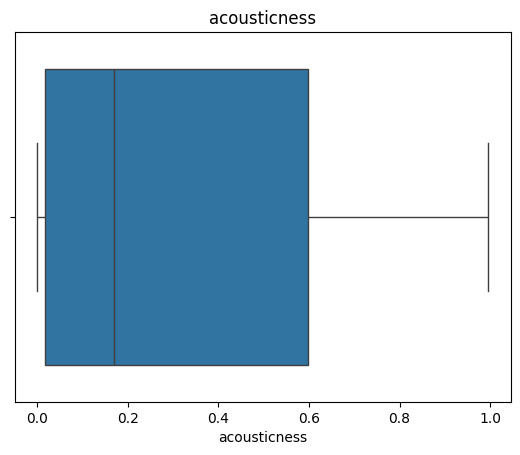

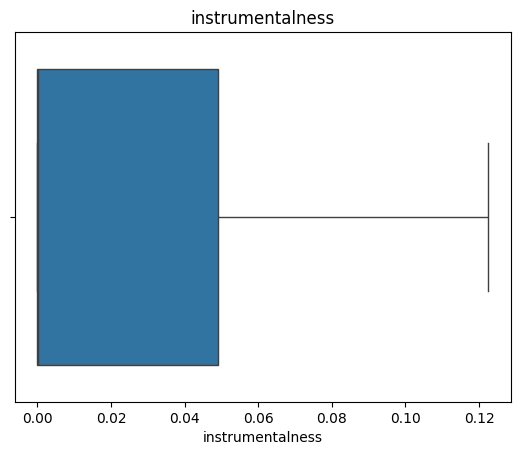

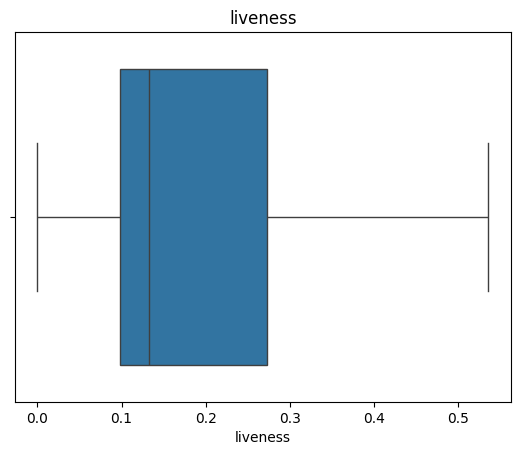

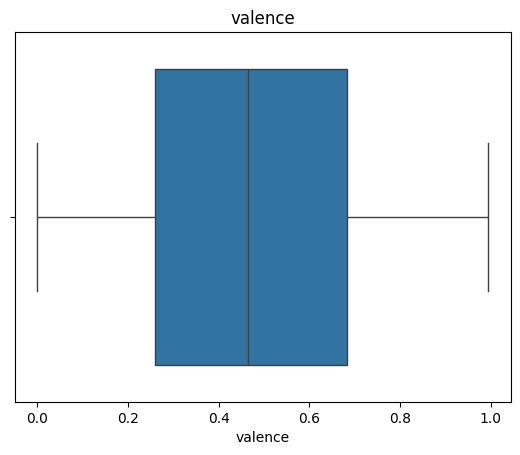

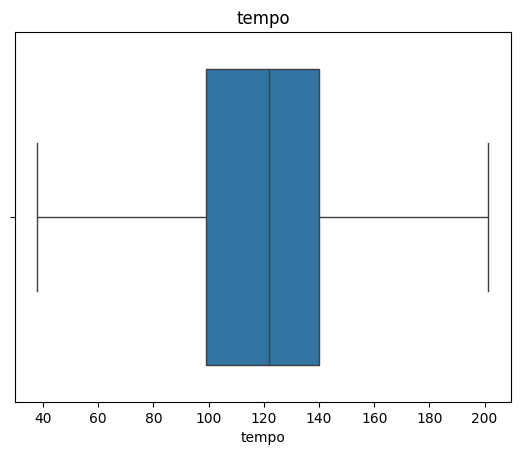

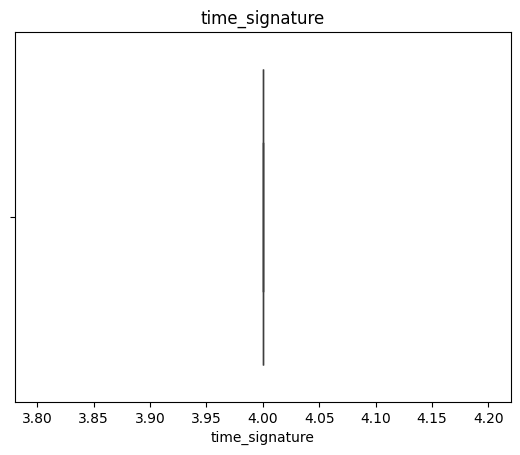

In [ ]:
# Cek outlier secara visual
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Penanganan outlier dengan Winsorization:
1. Hitung kuartil (Q1, Q3) dan IQR
2. Tentukan batas bawah dan atas
3. Ganti nilai di luar batas dengan nilai batas
4. Visualisasi kembali untuk memeriksa hasil



### 🔧 Penanganan Outlier dengan Winsorization

Outlier yang terdeteksi tidak langsung dihapus, melainkan ditangani menggunakan metode **Winsorization**. Berbeda dari pendekatan *trimming* yang membuang data ekstrem, Winsorization mempertahankan jumlah data dengan cara membatasi nilai-nilai ekstrem ke batas tertentu.

#### 📊 Dasar Perhitungan: Interquartile Range (IQR)

Winsorization dilakukan berdasarkan rentang antar-kuartil (IQR), dengan langkah berikut:

* **Q1 (Kuartil 1):** Persentil ke-25
* **Q3 (Kuartil 3):** Persentil ke-75
* **IQR = Q3 - Q1**

Nilai batas bawah dan atas ditentukan dengan rumus:

* **Lower Bound = Q1 - 1.5 × IQR**
* **Upper Bound = Q3 + 1.5 × IQR**

Nilai di bawah batas bawah akan digantikan oleh batas bawah, dan sebaliknya untuk nilai di atas batas atas.

#### 🎯 Tujuan Penggunaan Winsorization

* Menekan efek ekstrem dari outlier tanpa mengurangi jumlah data.
* Menjaga distribusi data tetap utuh dan representatif.
* Meningkatkan stabilitas dan akurasi model, terutama dalam regresi.

Metode ini sangat berguna saat data mengandung outlier, namun tetap ingin mempertahankan keseluruhan observasi dibandingkan harus menghapusnya secara permanen.

#### Data Encode

In [ ]:
# Preprocessing
user_ids = df['track_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Encoding ID track:
1. Membuat mapping dari track_id ke indeks numerik
2. Membuat mapping sebaliknya (indeks ke track_id)

#### Normalisasi

In [ ]:
# Normalisasi rating
df['popularity'] = df['popularity'].values.astype(np.float32)
min_rating = min(df['popularity'])
max_rating = max(df['popularity'])
df['norm_popularity'] = (df['popularity'] - min_rating) / (max_rating - min_rating)

Normalisasi popularity ke range 0-1:
1. Konversi ke float32
2. Hitung min dan max popularity
3. Normalisasi dengan min-max scaling

#### Split Data

Membagi dataset menjadi:
- 80% data training untuk melatih model
- 20% data testing untuk validasi

In [ ]:
# Split data
x = df[['track_id']].apply(lambda x: x.map(user_to_user_encoded)).values
y = df['norm_popularity'].values

In [ ]:
# Membagi dataset
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

## Membangun Model

Arsitektur model recommendation system:
1. Embedding layer untuk user dan musik
2. Dot product layer untuk menghitung similarity
3. Output layer dengan aktivasi sigmoid

In [ ]:
# Model Architecture
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, embedding_size=64, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.dense = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        x = self.dense(user_vector + user_bias)
        return self.output_layer(x)

# Initialize model
model = RecommenderNet(len(user_to_user_encoded), 64)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(0.001),
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)


Arsitektur Neural Collaborative Filtering:
1. Embedding Layer:
   - Mempelajari representasi vektor untuk setiap track
   - Ukuran embedding: 64 dimensi
   - Inisialisasi: he_normal
   - Regularisasi: L2 dengan faktor 1e-6
2. Bias Layer:
   - Menangkap bias spesifik untuk setiap track
3. Dense Layer:
   - 32 neuron dengan aktivasi ReLU
4. Output Layer:
   - 1 neuron dengan aktivasi sigmoid (untuk prediksi 0-1)

   Kompilasi model:
- Loss function: Binary Crossentropy (karena output sigmoid)
- Optimizer: Adam dengan learning rate 0.001
- Metrics: RMSE dan MAE untuk evaluasi

## Training Model

Proses pelatihan model dengan:
- Batch size 64
- Maksimal 15 epoch
- Early stopping untuk mencegah overfitting

In [ ]:
# Training
print("\nMemulai Training Model...")
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=15,
    validation_data=(x_val, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)

# Plotting hasil training
plt.figure(figsize=(12, 5))



Memulai Training Model...
Epoch 1/15
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 64s 44ms/step - loss: 0.6306 - mean_absolute_error: 0.1878 - root_mean_squared_error: 0.2240 - val_loss: 0.6105 - val_mean_absolute_error: 0.1397 - val_root_mean_squared_error: 0.1781
Epoch 2/15
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 64s 45ms/step - loss: 0.5384 - mean_absolute_error: 0.0874 - root_mean_squared_error: 0.1084 - val_loss: 0.6084 - val_mean_absolute_error: 0.1328 - val_root_mean_squared_error: 0.1762
Epoch 3/15
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - loss: 0.5157 - mean_absolute_error: 0.0509 - root_mean_squared_error: 0.0696 - val_loss: 0.6052 - val_mean_absolute_error: 0.1297 - val_root_mean_squared_error: 0.1727
Epoch 4/15
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - loss: 0.5114 - mean_absolute_error: 0.0481 - root_mean_squared_error: 0.0654 - val_loss: 0.6086 - val_mean_absolute_error: 0.1342 - val_root_mean_squared_error: 0.1760
Epoch 5/15
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - loss: 0.506

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Proses training:
- Batch size: 64 (jumlah sampel per update gradient)
- Epoch: 15 iterasi maksimum
- Validation data: 20% data yang disisihkan
- Early stopping: Berhenti jika tidak ada improvement dalam 3 epoch

## Evaluasi Model

Visualisasi performa model:
1. Grafik RMSE (Root Mean Squared Error)
2. Grafik Loss (Binary Crossentropy)

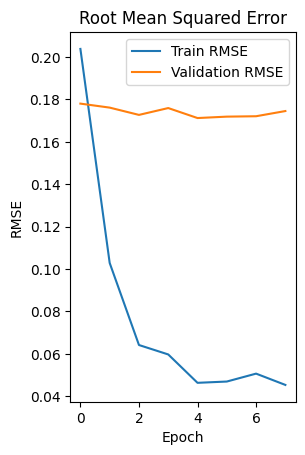

In [ ]:
# Plot RMSE
plt.subplot(1, 2, 1)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()

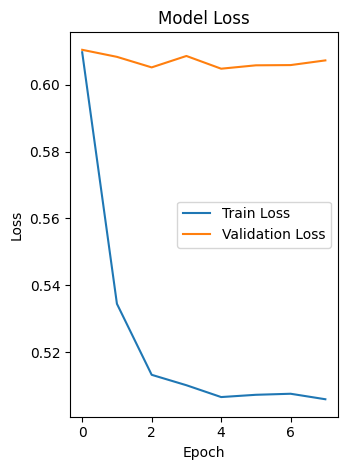

In [ ]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Visualisasi performa model:
1. RMSE:
   - Error prediksi dalam skala asli
   - Semakin kecil semakin baik
2. Loss:
   - Binary crossentropy loss
   - Menunjukkan seberapa baik model belajar

## Membuat Rekomendasi

Fungsi untuk menghasilkan rekomendasi:
1. Menerima input user ID
2. Menghitung prediksi rating untuk musik yang belum didengar
3. Mengembalikan N rekomendasi terbaik

In [ ]:
# Fungsi rekomendasi
def get_recommendations(track_id, n_recommendations=10):
    try:
        user_encoder = user_to_user_encoded[track_id]
    except KeyError:
        return f"Track ID {track_id} tidak ditemukan dalam dataset"

    # Generate semua track
    all_tracks = np.array([[user_encoder, i] for i in range(len(user_ids))])

    # Prediksi rating
    predictions = model.predict(all_tracks).flatten()

    # Urutkan prediksi
    top_indices = predictions.argsort()[-n_recommendations:][::-1]

    print(f'\nRekomendasi untuk Track {track_id}:')
    print('='*50)
    for i, idx in enumerate(top_indices, 1):
        track = user_encoded_to_user[idx]
        pred_rating = predictions[idx] * (max_rating - min_rating) + min_rating
        print(f"{i}. Track ID: {track} | Prediksi Popularity: {pred_rating:.2f}")

    return [user_encoded_to_user[idx] for idx in top_indices]

Fungsi rekomendasi:
1. Menerima track_id sebagai input
2. Mengembalikan 10 rekomendasi teratas
3. Proses:
   - Encode track_id
   - Prediksi popularity untuk semua track
   - Urutkan berdasarkan prediksi
   - Kembalikan track_id dengan prediksi tertinggi
4. Mengkonversi kembali nilai normalisasi ke skala asli

In [ ]:
# Contoh penggunaan
sample_track = df['track_id'].sample(1).iloc[0]
print(f"\nContoh Track: {sample_track}")
recommendations = get_recommendations(sample_track)


Contoh Track: 30kaQow1m0y1G2UcNTTSYk
2805/2805 ━━━━━━━━━━━━━━━━━━━━ 3s 970us/step

Rekomendasi untuk Track 30kaQow1m0y1G2UcNTTSYk:
1. Track ID: 2hETkH7cOfqmz3LqZDHZf5 | Prediksi Popularity: 35.42
2. Track ID: 7J2gyNghNTzl4EsLhXp01Q | Prediksi Popularity: 35.42
3. Track ID: 2E43WFS4rRc09za2r2GmZl | Prediksi Popularity: 35.42
4. Track ID: 074NgeLzrXD9hQ5O3iNIcY | Prediksi Popularity: 35.42
5. Track ID: 6Ox1rvlwEpB49drasQm6RF | Prediksi Popularity: 35.42
6. Track ID: 4paTIojVRwNvVfS70Q0nvT | Prediksi Popularity: 35.42
7. Track ID: 0MW5zwGXciXyVdFwQbvBq8 | Prediksi Popularity: 35.42
8. Track ID: 5RZt3aBokyH2EEqWBef7uS | Prediksi Popularity: 35.42
9. Track ID: 14boA065HMHWvqyPPEeN4y | Prediksi Popularity: 35.42
10. Track ID: 17wxJ7IZKboyECnxZw7Vo1 | Prediksi Popularity: 35.42


Sistem telah memberikan 10 rekomendasi lagu yang dinilai memiliki kemiripan dengan lagu input (30kaQow1m0y1G2UcNTTSYk).
Semua lagu yang direkomendasikan memiliki prediksi popularitas yang sama (35.42), yang bisa jadi merupakan hasil dari model regresi prediktif yang dibuat (misalnya menggunakan neural network) berdasarkan fitur-fitur seperti danceability, energy, valence, dsb.

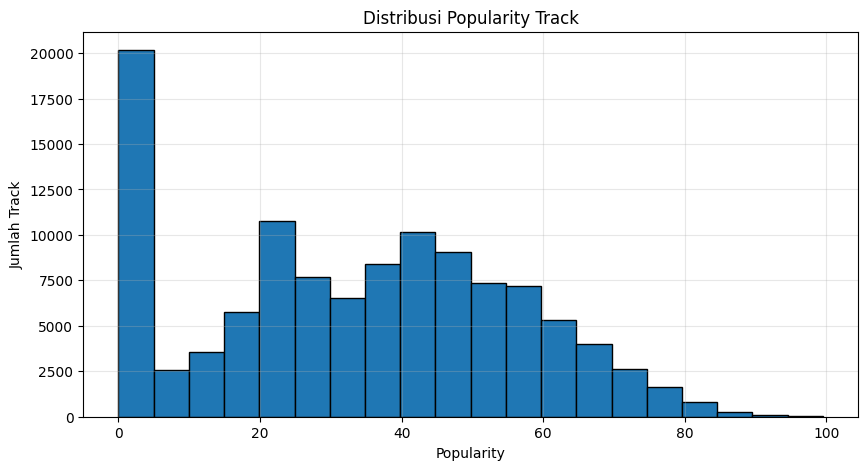

In [ ]:
# Plot distribusi popularity
plt.figure(figsize=(10, 5))
plt.hist(df['popularity'], bins=20, edgecolor='black')
plt.title('Distribusi Popularity Track')
plt.xlabel('Popularity')
plt.ylabel('Jumlah Track')
plt.grid(True, alpha=0.3)
plt.show()

Kode tersebut merupakan visualisasi distribusi nilai popularitas lagu dalam dataset.